In [2]:
import numpy as np



In [3]:
def hypothesis(x, theta0, theta1):
    y = theta0 + theta1 * x
    return y
    

In [4]:
x = np.array([1.0, 2.0, 3.0])
print(hypothesis(x, 0, 3))

[3. 6. 9.]


In [5]:
def cost(x, y, theta0, theta1):
    return (1/2*len(x)) * np.sum(np.square(hypothesis(x, theta0, theta1) - y))

In [6]:
def gradient(theta0, theta1, learning_rate, x, y, iter):
    t0 = theta0
    t1 = theta1
    history = []
    for i in range(iter):
        prediction = hypothesis(x, t0, t1)
        temp0 = t0 - learning_rate / len(x) * np.sum(prediction - y)
        temp1 = t1 - learning_rate / len(x) * np.sum(np.multiply((prediction - y), x))
        t0 = temp0
        t1 = temp1
        history.append([t0, t1])
    return history

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data[:,1].shape, boston.target.shape


((506,), (506,))

In [8]:
x = boston.data[:,0]
y = boston.target

theta0 = 0
theta1= 0

history = gradient(theta0, theta1, 0.01, x, y, 100)
theta0 = history[-1][0]
theta1 = history[-1][1]

In [9]:
def visualize(thetas, x, y):
    plt.interactive(True)
    for i in range(len(thetas)):
        plt.plot(x, y, color='r', marker='x', linestyle='None')
        ts = thetas[i]
        predict = hypothesis(x, ts[0], ts[1])
        plt.plot(x, predict, color='blue')
        plt.show()
        plt.clf()

In [10]:
len(history)

100

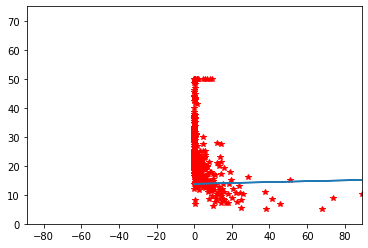

In [11]:
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import HTML


fig = plt.figure()
ax = plt.axes(xlim=(-np.amax(x),np.amax(x)), ylim=(0,1.5 * np.amax(y)))

lines = [plt.plot([], [], color='red', marker='*', linestyle='None')[0],plt.plot([], [])[0]]

def animate(i):
    ts = history[i]
    lines[0].set_data(x,y)
    lines[1].set_data(x, hypothesis(x, ts[0], ts[1]))
    return lines

anim = animation.FuncAnimation(fig, animate, 
           frames=len(history), interval=60, blit=True)
anim.save('line.gif', dpi=80, writer='imagemagick')
plt.show()

